# COMPSCI 714 - Assignment 1

This assignment will evaluate the content covered in weeks 1 & 2. This assignment aims at evaluating your coding skills, aligned with what we covered in the lectutorials, but also your critical thinking and self-learning abilities with a few more advanced questions.

**Name**: Ipsita Singh 

**UPI**: Isin038

**Student ID**: 919561278

## **Part 1: Data loading, exploration, cleaning and pre-processing** - 17 marks

Some of the libraries useful to this part are found in the following cell. You might need to import some more yourself for some of the tasks.

In [1]:
import sys
!{sys.executable} -m pip install torch torchvision torchaudio
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_regression



### **Task 1: Load the dataset** - 1 mark
The dataset used in the assignment contains multiple attributes of houses and their target sale price stored in `SalePrice`. \
You can find information about each attribute in the "Housing Price Data Dictionnary.txt" file.

**Task deliverable**:
- Load the dataset contained in the file *house_prices.csv* as a Pandas DataFrame in a variable called `df_data`. 

In [2]:
house_path="house_prices.csv"
df=pd.read_csv(house_path)


### **Task 2: Extract basic dataset information** - 2 marks

**Task deliverable**:

Complete the `extract_basic_info()` function which takes a tabular dataset in the form of a Pandas Dataframe as parameter, and returns a tuple containing the following information:
- The number of instances in the dataset.
- The total number of attributes in the dataset.
- The number of numerical attributes.
- The number of categorical attributes.
- The total memory size of the dataset.

The order of the elements in the returned tuple should follow the same order as follow: (number of instances, totoal number of attributes, number of numerical attributes, number of categorical attributes, total memory size).

**Remarks**: 
- For this task, we define a numerical attribute as an attribute having numeric values. These values could represent a continuous or categorical attribute. Contrastively, we define a symbolic attribute as an attribute having non-numeric values.
- During grading, your function will be tested with the dataset previously loaded, but also with other hidden datasets. Make sure to test it to make sure it works fine on a few other datasets. 

In [3]:
def extract_basic_info(df_dataset):
    print(df_dataset.head()) # Display the first few rows of the DataFrame
    print(df_dataset.info(verbose=False)) # Get basic info about the DataFrame (data types, columns, non-null count, memory usage etc.)
    print(df_dataset.describe())#Get summary of the numerical columns.

    return 

extract_basic_info(df)

   Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.0     8450   Pave     ?      Reg   
1   2          20       RL        80.0     9600   Pave     ?      Reg   
2   3          60       RL        68.0    11250   Pave     ?      IR1   
3   4          70       RL        60.0     9550   Pave     ?      IR1   
4   5          60       RL        84.0    14260   Pave     ?      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0      ?     ?           ?       0      2   
1         Lvl    AllPub  ...        0      ?     ?           ?       0      5   
2         Lvl    AllPub  ...        0      ?     ?           ?       0      9   
3         Lvl    AllPub  ...        0      ?     ?           ?       0      2   
4         Lvl    AllPub  ...        0      ?     ?           ?       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         

### **Task 3: Basic exploration** - 2 marks

#### **Task 3.1 - Histograms of surface attributes** - 1 mark
This question is based on the dataset loaded in Task 1.

**Task deliverable**:
- Identify the 14 attributes representing areas in square feet in the dataset, and plot them as histograms.

**Remark**: Having a look in the data dictionary provided with the dataset might help.


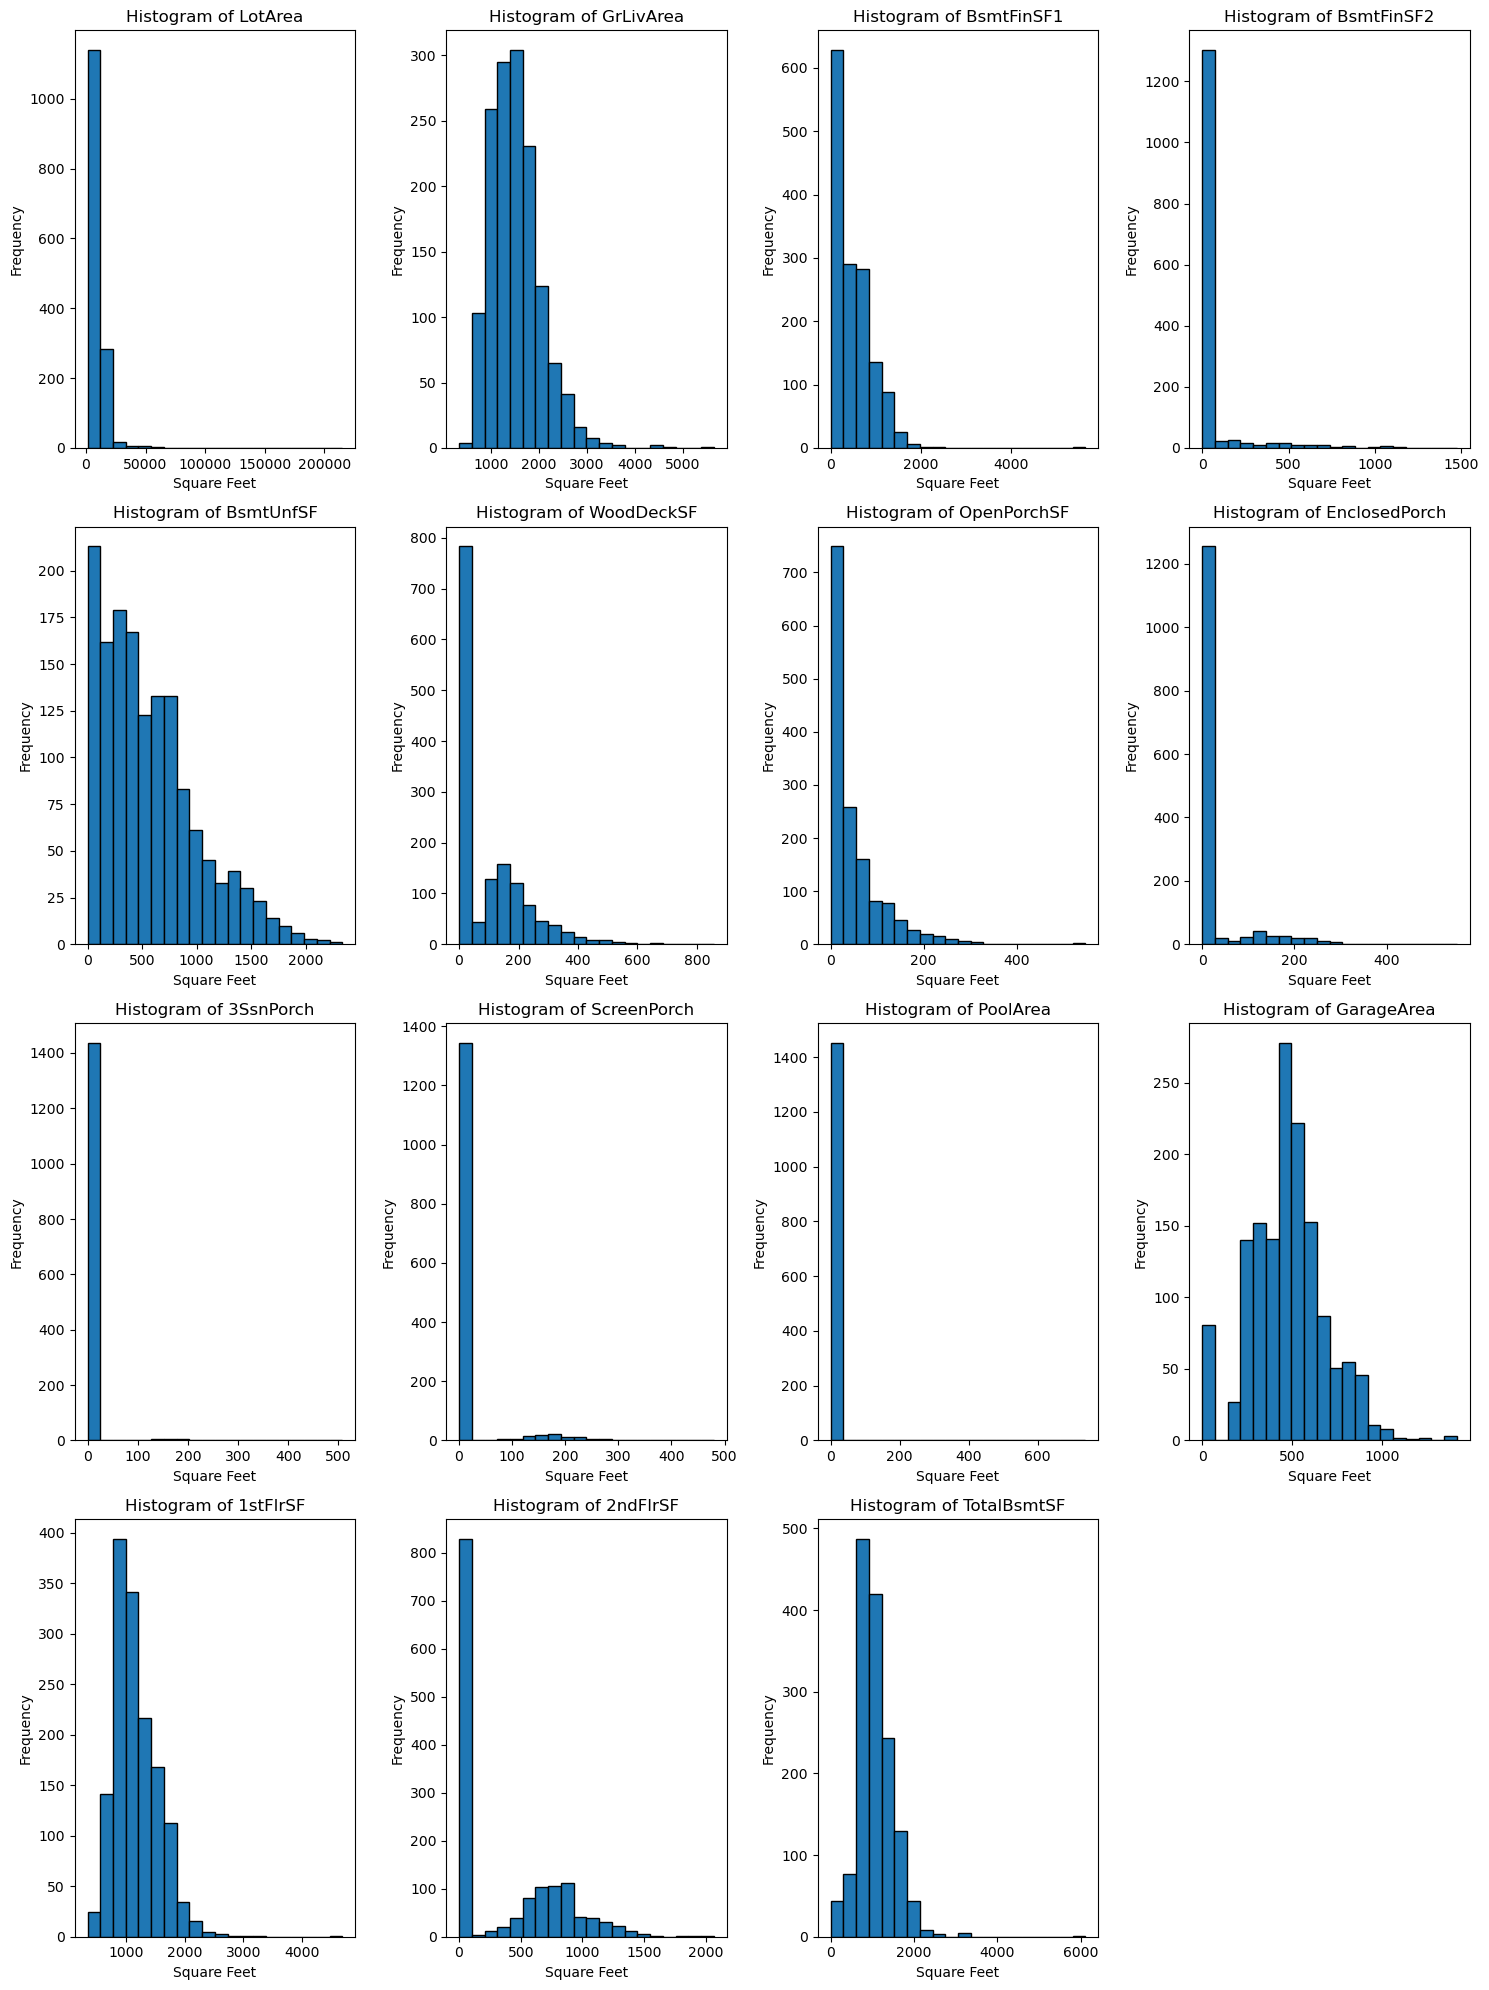

In [4]:
#1 Identifying 14 Attributes repr Dataset Areas in sq feet
area_columns=[
    "LotArea",
    "GrLivArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "GarageArea",
    "1stFlrSF",
    "2ndFlrSF",
    "TotalBsmtSF"   
]


# Number of histograms
num_columns = len(area_columns)

# Define the number of rows and columns for the subplots (adjust as needed)
ncols = 4  # 4 columns
nrows = (num_columns + ncols - 1) // ncols  # Calculate number of rows to fit all subplots

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array to easily index them

# Plot each histogram
for i, column in enumerate(area_columns):
    axes[i].hist(df[column], bins=20, edgecolor='black')
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel("Square Feet")
    axes[i].set_ylabel("Frequency")

# Hide empty subplots if the number of columns is not a perfect multiple of ncols
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout
plt.tight_layout()
plt.show()



#### **Task 3.2: Correlations with target** - 1 mark
**Task deliverable**:
- Display in descending order the correlation coefficients between the 14 area attributes identified previously and the target attribute `SalePrice`. 

In [5]:
target_var="SalePrice"
corr={} #initiating an empty dictionary to store correlations
for var in area_columns: 
    corr[var]=df[var].corr(df[target_var]) #Calculating correlations between each area attribute and SalePrice
correlation_series = pd.Series(corr) #converting corr dictionary into panda series for sorting
sorted_correlations = correlation_series.sort_values(ascending=False) #diplaying area attributes in descending order of correlation coefficients
print(sorted_correlations)

GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
EnclosedPorch   -0.128578
dtype: float64


### **Task 4: Splitting the data in train and test sets** - 4 marks
The dataset has a modest size, so it might be worth investigating the use of stratified sampling.

#### **Task 4.1: Selecting and preparing an attribute for the sampling** - 2 marks

**Task deliverables**:

1. Select the area attribute (from Task 3.2) with the highest correlation to the target `SalePrice`. \
Based on the selected attribute, sort the instances into 4 bins. The bins edges are defined as: [$0$, $median \times 0.5$, $median$, $median \times 1.5$, $\infty$]. \
$median$ corresponds to the median value of the previously selected area attribute's values. \
Create a new attribute corresponding to the category each instance (house) is binned into.
3. Visualise the number of instances (houses) in each category with a bar plot.

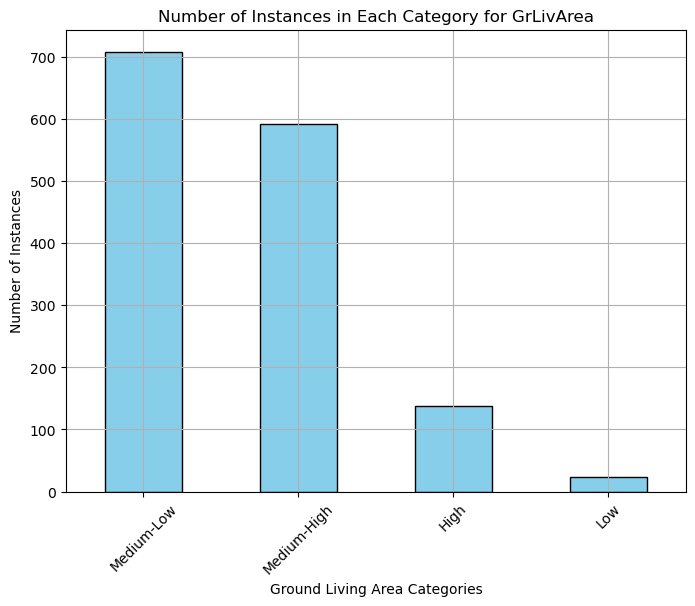

In [6]:
highest_corr_attribute = sorted_correlations.index[0] #finding first value in sorted correlation array
median_val = df[highest_corr_attribute].median() #median value of the highest correlated attribute
bin_edges=[0, median_val*0.5, median_val, median_val*1.5, np.inf]
#pd.cut method helps us assign each row to one category based on highest correlated coefficient
df_copy=df.copy()
#Making a new column 'Area_bin' in df_copy to store the categories of Garage_area
df_copy['Area_Bin']=pd.cut(df_copy[highest_corr_attribute], bins=bin_edges, labels=['Low', 'Medium-Low', 'Medium-High', 'High']) 

#Visualizing the number of instances in each category
plt.figure(figsize=(8, 6))
df_copy['Area_Bin'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', grid=True)
plt.title(f'Number of Instances in Each Category for {highest_corr_attribute}')
plt.xlabel('Ground Living Area Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

#### **Task 4.2: Train/valid/test sets split using stratified sampling** - 2 marks

**Task deliverable**:

1. Split the dataset into train, validation and test sets using stratified sampling based on the the new categorical attribute you created in Task 4.1. Use a 60%/20%/20% split for train/validation/test sets.
2. Compare the proportions of instances (in percentage) for each category in:
   - the overall dataset,
   - the stratified train and test sets, and
   - randomly splitted train and test sets (without stratified sampling).
   
   Briefly explain the difference of results between stratified and random sampling. Does the choice of stratified sampling make sense in that case?

**Remark**: 
- Don't forget to drop the new feature created for stratifed sampling from the training and test sets after completing this task.


In [7]:
from sklearn.model_selection import train_test_split
df = df_copy.dropna(subset=['Area_Bin'])
#Splitting copy of df into train and (test+split) as a temp df
strat_train_set, temp_df = train_test_split(
df, test_size=0.4, stratify=df['Area_Bin'], random_state=42)
#Splitting temp_df into test and split
strat_valid_set, strat_test_set=train_test_split(
temp_df, test_size=0.5, stratify=temp_df['Area_Bin'], random_state=42)

In [8]:
# Task 4.2.2 Compare the proportions of instances (in percentage) for each category 
train_set, test_set = train_test_split(df_copy, test_size=0.2, random_state=42)
###SHOULD THIS BE DONE TWICE for VALIDATION DATA SET

In [9]:
#calculates each category proportion in the Area Bin column relative to the total number of rows in df
def garagearea_cat_proportions(df):
    return df['Area_Bin'].value_counts() / len(df) 

compare_props = pd.DataFrame({
    "Overall %": garagearea_cat_proportions(df_copy),
    "Stratified Train %": garagearea_cat_proportions(strat_train_set),
    "Stratified Test %": garagearea_cat_proportions(strat_test_set),
    "Random Train %": garagearea_cat_proportions(train_set),
    "Random Test %": garagearea_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Garage Area Category"
compare_props["Strat. Error Train %"] = (compare_props["Stratified Train %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Strat. Error Test %"] = (compare_props["Stratified Test %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error Train %"] = (compare_props["Random Train %"] /
                                  compare_props["Overall %"] - 1)
compare_props["Rand. Error Test %"] = (compare_props["Random Test %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)
##Is this error too small?

,Overall %,Stratified Train %,Stratified Test %,Random Train %,Random Test %,Strat. Error Train %,Strat. Error Test %,Rand. Error Train %,Rand. Error Test %
Garage Area Category,,,,,,,,,
Low,1.58,1.60,1.37,1.28,2.74,1.45,-13.04,-18.48,73.91
Medium-Low,48.49,48.52,48.29,47.95,50.68,0.05,-0.42,-1.13,4.52
Medium-High,40.48,40.41,40.75,41.35,36.99,-0.17,0.68,2.16,-8.63
High,9.45,9.47,9.59,9.42,9.59,0.24,1.45,-0.36,1.45


In [10]:
# print(strat_train_set.columns)
# print(strat_valid_set.columns)
# print(strat_test_set.columns)

In [11]:
# explain the difference of results between stratified and random sampling.
# 1. Stratified Sampling vs Random Sampling
#         a) Proportions for all categories (Low, Medium-Low, Medium-High, High) in Stratified Test and Train % are similar to overall proportions.
#                Proportions for all categories in Random Sampling are more varied from overall proportions, espeically in the Random Test data set
#         b) Strat Error Train % and Test % are small and positive so the straified sample is a good subset of data
#                 Rand Error Train and Test are larger and negative, so certain categories are underrepresented and overrepresented. 
#         c) Stratified sampling proportionally represents each category, reducing the error.
#                 Random Sampling introduces more variability in how categories are splitted into train and test datasets

# 2. Yes, the choice of Stratified Sampling makes sense, as we can see that Medium-Low and Medium-High Categories are voerrepresented in our dataset.
#     Low and High categories are overrepresented, so we should choose strafiied sampling to train and test the dataset. 

In [12]:
# Drop "Area_Bin" from strat_train_set
if "Area_Bin" in strat_train_set.columns:
    strat_train_set.drop("Area_Bin", axis=1, inplace=True)
    print("Area_Bin dropped from strat_train_set")
else:
    print("Area_Bin not found in strat_train_set, skipping drop.")

# Drop "Area_Bin" from strat_valid_set
if "Area_Bin" in strat_valid_set.columns:
    strat_valid_set.drop("Area_Bin", axis=1, inplace=True)
    print("Area_Bin dropped from strat_valid_set")
else:
    print("Area_Bin not found in strat_valid_set, skipping drop.")

# Drop "Area_Bin" from strat_test_set
if "Area_Bin" in strat_test_set.columns:
    strat_test_set.drop("Area_Bin", axis=1, inplace=True)
    print("Area_Bin dropped from strat_test_set")
else:
    print("Area_Bin not found in strat_test_set, skipping drop.")


Area_Bin dropped from strat_train_set
Area_Bin dropped from strat_valid_set
Area_Bin dropped from strat_test_set


### **Task 5: Pre-processing pipeline** - 4 marks

**Task deliverables**:
1. Build a pre-processing pipeline with:
    - Missing values handling based on median for numerical attributes and most frequent value for categorical attributes.
    - Standardisation for numerical attributes.
    - Categorical attributes encoding with one-hot encoding.

2. *Fit and apply* the pipeline to the stratified train set, without the target values (`SalePrice`). Then, *apply* the fitted pipeline to the stratified validation and test sets, without the target values. 

3. Did the number of attributes in the sets change after applying this pre-processing pipeline? If yes, briefly explain why.


In [35]:
#### DATA CLEANING
#create a copy of the original training set, with labels stored in a seperate variable.

housing_train_data = strat_train_set.drop("SalePrice", axis=1)
housing_train_labels = strat_train_set["SalePrice"].copy() #y_train

# Create copies of validation and test sets without SalePrice
housing_valid_data = strat_valid_set.drop("SalePrice", axis=1).copy()
housing_test_data = strat_test_set.drop("SalePrice", axis=1).copy()

# Keep the labels separate for validation and test sets
housing_valid_labels = strat_valid_set["SalePrice"].copy() # y_valid
housing_test_labels = strat_test_set["SalePrice"].copy() # y_test

# print("Info of housing_train_data:", housing_train_data.info())
# print("Shape of housing_train_labels:", housing_train_labels.shape)
# print("Shape of sethousing_valid:", housing_valid_data.shape)
# print("Shape of housing_valid_labels:", housing_valid_labels.shape)
# print("Shape of sethousing_test:", housing_test_data.shape)
# print("Shape of housing_test_labels:", housing_test_labels.shape)

In [37]:
# Before calling preprocess_housing_data
housing_train_data_cleaned = housing_train_data.copy()
housing_val_data_cleaned = housing_valid_data.copy()
housing_test_data_cleaned = housing_test_data.copy()

# Replace '?' with np.nan in all DataFrames
for df in [housing_train_data_cleaned, housing_val_data_cleaned, housing_test_data_cleaned]:
    df.replace('?', np.nan, inplace=True)

In [38]:
def preprocess_housing_data(X_train, X_val, X_test):

    """

    Create and apply a preprocessing pipeline for housing data.

    

    Parameters:

    X_train (pd.DataFrame): Training set features
    X_val (pd.DataFrame): Validation set features
  X_test (pd.DataFrame): Test set features

    

    Returns:

    tuple: Transformed training, validation, and test sets

    """
    # Identify numerical and categorical columns dynamically
    def get_column_types(df):
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = []

        object_cols = df.select_dtypes(include=['object']).columns
        for col in object_cols:
            try:
                temp_series = df[col].replace('?', np.nan)
                pd.to_numeric(temp_series, errors='raise')
                numeric_cols.append(col)
                print(f"Column '{col}' identified as numeric. Data type after '?': {temp_series.dtype}") # Added print
            except ValueError:
                categorical_cols.append(col)
                print(f"Column '{col}' identified as categorical.")

        return numeric_cols, categorical_cols
    # Get column types for training set (used as reference)

    numerical_columns, categorical_columns = get_column_types(X_train)

    

    # Create preprocessing steps for numerical columns

    numerical_transformer = Pipeline(steps=[

        ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median

        ('scaler', StandardScaler())  # Standardize numerical features

    ])

    

    # Create preprocessing steps for categorical columns

    categorical_transformer = Pipeline(steps=[

        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values with most frequent value

        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding

    ])

    

    # Combine transformers

    preprocessor = ColumnTransformer(

        transformers=[

            ('num', numerical_transformer, numerical_columns),

            ('cat', categorical_transformer, categorical_columns)

        ])

    

    # Fit the preprocessor on training data and transform all sets

    X_train_processed = preprocessor.fit_transform(X_train)

    X_val_processed = preprocessor.transform(X_val)

    X_test_processed = preprocessor.transform(X_test)

    

    # Get feature names for categorical columns

    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']

    

    # Get feature names

    numerical_feature_names = numerical_columns

    try:

        categorical_feature_names = list(onehot_encoder.get_feature_names_out(categorical_columns))

    except AttributeError:

        # Fallback for older scikit-learn versions

        categorical_feature_names = list(onehot_encoder.get_feature_names(categorical_columns))

    

    # Combine feature names

    feature_names = numerical_feature_names + categorical_feature_names

    

    # Convert to DataFrame with correct column names

    X_train_processed_df = pd.DataFrame(

        X_train_processed,

        columns=feature_names,

        index=X_train.index

    )

    

    X_val_processed_df = pd.DataFrame(

        X_val_processed,

        columns=feature_names,

        index=X_val.index

    )

    

    X_test_processed_df = pd.DataFrame(

        X_test_processed,

        columns=feature_names,

        index=X_test.index

    )

    

    # Print information about attribute changes

    print("Original number of attributes:")

    print(f"Train set: {X_train.shape[1]}")

    print(f"Validation set: {X_val.shape[1]}")

    print(f"Test set: {X_test.shape[1]}")

    

    print("\nProcessed number of attributes:")

    print(f"Train set: {X_train_processed_df.shape[1]}")

    print(f"Validation set: {X_val_processed_df.shape[1]}")

    print(f"Test set: {X_test_processed_df.shape[1]}")

    

    return X_train_processed_df, X_val_processed_df, X_test_processed_df 

In [41]:
# After your preprocessing steps
X_train_processed, X_val_processed, X_test_processed = preprocess_housing_data(
    housing_train_data_cleaned,  # Use the cleaned DataFrames
    housing_val_data_cleaned,
    housing_test_data_cleaned
)

Column 'MSZoning' identified as categorical.
Column 'LotFrontage' identified as numeric. Data type after '?': object
Column 'Street' identified as categorical.
Column 'Alley' identified as categorical.
Column 'LotShape' identified as categorical.
Column 'LandContour' identified as categorical.
Column 'Utilities' identified as categorical.
Column 'LotConfig' identified as categorical.
Column 'LandSlope' identified as categorical.
Column 'Neighborhood' identified as categorical.
Column 'Condition1' identified as categorical.
Column 'Condition2' identified as categorical.
Column 'BldgType' identified as categorical.
Column 'HouseStyle' identified as categorical.
Column 'RoofStyle' identified as categorical.
Column 'RoofMatl' identified as categorical.
Column 'Exterior1st' identified as categorical.
Column 'Exterior2nd' identified as categorical.
Column 'MasVnrType' identified as categorical.
Column 'MasVnrArea' identified as numeric. Data type after '?': object
Column 'ExterQual' identifi

In [ ]:
#The significant increase in the number of columns (from 80 to 290) is due to One-Hot Encoding of categorical variables.
#Implications:

#1. Greatly Increases dimensionality of the dataset
#2. Allows machine learning models to work with categorical data
#3. Preserves information about categorical variables
#4. May require feature selection or dimensionality reduction techniques if too many features are created

### **Task 6: Feature selection with Mutual information** - 4 marks

The previous step led to generating a lot of attributes and not all of them might be useful to build a model. 
In this task, you have to perform feature selection using mutual information. Mutual information can be used to measure associations between an attribute and the target. It is similar to correlation in this way, but the advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

**Task deliverables**:

1. Using the train set only, generate a ranking of the attributes based on mutual information with the target `SalePrice`.
2. Drop the attributes with mutual information smaller than 0.01 from the train, valid and test sets.
3. Display the number of attributes which were removed during the selection.

In [46]:
def select_features_by_mutual_information(X_train, X_val, X_test, y_train, threshold=0.01):
    """
    Perform feature selection using mutual information.
    
    Parameters:
    X_train (pd.DataFrame): Processed training features
    X_val (pd.DataFrame): Processed validation features
    X_test (pd.DataFrame): Processed test features
    y_train (pd.Series): Training target variable
    threshold (float): Mutual information threshold for feature selection
    
    Returns:
    tuple: Filtered training, validation, and test sets with selected features
    """
    # Calculate mutual information scores
    mi_scores = mutual_info_regression(X_train, y_train)
    
    # Create a DataFrame of feature names and their mutual information scores
    mi_df = pd.DataFrame({
        'feature': X_train.columns,
        'mutual_information': mi_scores
    })
    
    # Sort features by mutual information in descending order
    mi_df_sorted = mi_df.sort_values('mutual_information', ascending=False)
    
    # Print the top 10 features and their mutual information scores
    print("Top 10 Features by Mutual Information:")
    print(mi_df_sorted.head(10).to_string(index=False))
    
    # Identify features above the threshold
    selected_features = mi_df_sorted[mi_df_sorted['mutual_information'] >= threshold]['feature'].tolist()
    
    # Calculate number of removed features
    total_original_features = X_train.shape[1]
    selected_features_count = len(selected_features)
    removed_features_count = total_original_features - selected_features_count
    
    # Print feature selection summary
    print("\nFeature Selection Summary:")
    print(f"Total original features: {total_original_features}")
    print(f"Features selected (MI >= {threshold}): {selected_features_count}")
    print(f"Features removed: {removed_features_count}")
    
    # Filter datasets to keep only selected features
    X_train_selected = X_train[selected_features]
    X_val_selected = X_val[selected_features]
    X_test_selected = X_test[selected_features]
    
    return X_train_selected, X_val_selected, X_test_selected



In [66]:
# Perform feature selection
X_train_final, X_val_final, X_test_final = select_features_by_mutual_information(
    X_train_processed, 
    X_val_processed, 
    X_test_processed, 
    housing_train_labels
)

Top 10 Features by Mutual Information:
     feature  mutual_information
 OverallQual            0.578345
   GrLivArea            0.471927
   YearBuilt            0.404681
 TotalBsmtSF            0.378350
  GarageCars            0.377602
 GarageYrBlt            0.346791
    1stFlrSF            0.337329
  GarageArea            0.335201
  MSSubClass            0.282649
ExterQual_TA            0.281878

Feature Selection Summary:
Total original features: 273
Features selected (MI >= 0.01): 141
Features removed: 132


## **Part 2: Training a simple neural network** - 13 marks

This second part is less guided than the first one. You are free to explore a bit more and be more creative to produce the deliverables, within a few constrains.

#### **Task 1: Build and train a neural network** - 8 marks
**Task deliverables**:
1. Build a simple neural network with 3 hidden layers and 1 output layer. There is no constrain on the number of neurons in each hidden layer, and the activation functions, but you can start with the advice below.
2. Build a training loop to train your model on the training set you produced in Part 1. Your training loop should:
   - Display the training loss and validation loss after each epoch.
   - Store the values of the training loss and validation loss after each epoch. 
3. Display a plot of your training and validation losses and demonstrate that your model is learning. 
4. Test your trained model by predicting a few "new" instances of the test set and comparing the predicted house value with the expected ones.


Constrains:
- You are required to use PyTorch for this task.
- You are required to use MSE as loss. 

Some advice:
- You can start with 150, 75 and 20 neurons in the 3 hidden layers.
- You can use ReLu as activation functions between layers to start with.
- Try using the Adam optimiser if your network does not train well with SGD.
- It might be practical to create a function containing your training loop, as shown in the lectutorial.

Epoch 1/100, Train Loss: 0.7324, Val Loss: 0.3419
Epoch 2/100, Train Loss: 0.2647, Val Loss: 0.1631
Epoch 3/100, Train Loss: 0.1377, Val Loss: 0.1369
Epoch 4/100, Train Loss: 0.1902, Val Loss: 0.1722
Epoch 5/100, Train Loss: 0.1228, Val Loss: 0.1323
Epoch 6/100, Train Loss: 0.1224, Val Loss: 0.1581
Epoch 7/100, Train Loss: 0.1085, Val Loss: 0.1398
Epoch 8/100, Train Loss: 0.1027, Val Loss: 0.1206
Epoch 9/100, Train Loss: 0.1093, Val Loss: 0.1375
Epoch 10/100, Train Loss: 0.1197, Val Loss: 0.1173
Epoch 11/100, Train Loss: 0.1040, Val Loss: 0.1347
Epoch 12/100, Train Loss: 0.0999, Val Loss: 0.1710
Epoch 13/100, Train Loss: 0.1162, Val Loss: 0.1414
Epoch 14/100, Train Loss: 0.0955, Val Loss: 0.1154
Epoch 15/100, Train Loss: 0.0905, Val Loss: 0.1278
Epoch 16/100, Train Loss: 0.0852, Val Loss: 0.1120
Epoch 17/100, Train Loss: 0.0935, Val Loss: 0.1285
Epoch 18/100, Train Loss: 0.0788, Val Loss: 0.1174
Epoch 19/100, Train Loss: 0.0699, Val Loss: 0.1180
Epoch 20/100, Train Loss: 0.0936, Val Lo

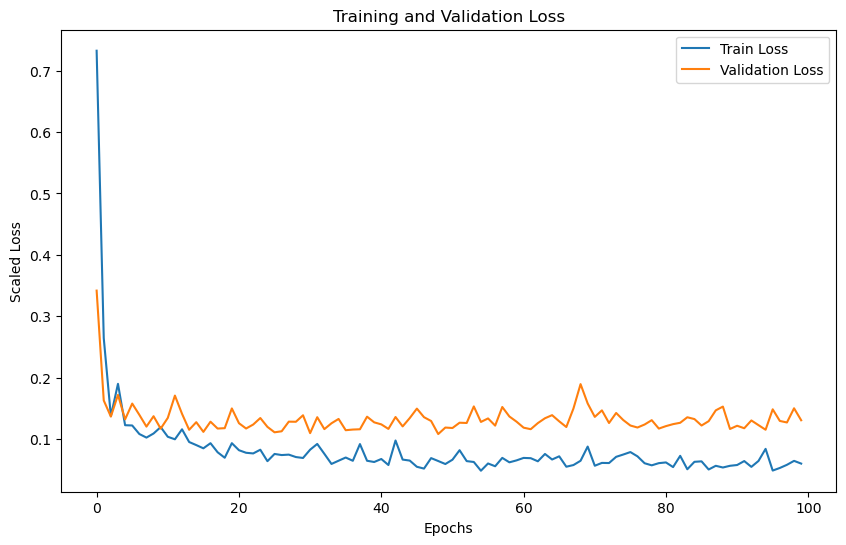


Sample Predictions:
Predicted: $123,898.73, Actual: $134,900.00
Predicted: $197,408.33, Actual: $193,879.00
Predicted: $95,557.23, Actual: $58,500.00
Predicted: $197,326.84, Actual: $205,000.00
Predicted: $176,790.83, Actual: $178,000.00

Test Set Metrics:
Mean Absolute Error: $22,265.61
Root Mean Squared Error: $69,290.45


In [68]:
# Scale the target variable (house prices)
def scale_target(y):
    y_mean = np.mean(y)
    y_std = np.std(y)
    y_scaled = (y - y_mean) / y_std
    return y_scaled, y_mean, y_std

# Unscale the predictions
def unscale_predictions(y_scaled, y_mean, y_std):
    return y_scaled * y_std + y_mean

# Scale features and target
scaler_features = StandardScaler()
X_train_scaled = scaler_features.fit_transform(X_train_final)
X_val_scaled = scaler_features.transform(X_val_final)
X_test_scaled = scaler_features.transform(X_test_final)

# Scale target variable
y_train_scaled, y_train_mean, y_train_std = scale_target(housing_train_labels.values)
y_val_scaled, y_val_mean, y_val_std = scale_target(housing_valid_labels.values)
y_test_scaled, y_test_mean, y_test_std = scale_target(housing_test_labels.values)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_val_tensor = torch.FloatTensor(X_val_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)

y_train_tensor = torch.FloatTensor(y_train_scaled).unsqueeze(1)
y_val_tensor = torch.FloatTensor(y_val_scaled).unsqueeze(1)
y_test_tensor = torch.FloatTensor(y_test_scaled).unsqueeze(1)

# Create DataLoaders
class HousingDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = HousingDataset(X_train_tensor, y_train_tensor)
val_dataset = HousingDataset(X_val_tensor, y_val_tensor)
test_dataset = HousingDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Neural Network Model
class HousePriceNN(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 150)
        self.fc2 = nn.Linear(150, 75)
        self.fc3 = nn.Linear(75, 20)
        self.fc4 = nn.Linear(20, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Instantiate model, loss, and optimizer
input_dim = X_train_final.shape[1]
model = HousePriceNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training Loop
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    train_losses, val_losses = [], []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_train_loss = 0.0
        
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        
        # Average training loss
        train_loss = running_train_loss / len(train_loader)
        train_losses.append(train_loss)
        
        # Validation phase
        model.eval()
        running_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                outputs = model(batch_X)
                val_loss = criterion(outputs, batch_y)
                running_val_loss += val_loss.item()
        
        # Average validation loss
        val_loss = running_val_loss / len(val_loader)
        val_losses.append(val_loss)
        
        # Print epoch summary
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer)

# Plot Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Scaled Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Model Evaluation on Test Set
model.eval()
test_predictions_scaled = []
test_actuals_scaled = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        test_predictions_scaled.extend(outputs.numpy())
        test_actuals_scaled.extend(batch_y.numpy())

# Unscale predictions
test_predictions = unscale_predictions(np.array(test_predictions_scaled), y_test_mean, y_test_std)
test_actuals = unscale_predictions(np.array(test_actuals_scaled), y_test_mean, y_test_std)

# Print sample predictions
print("\nSample Predictions:")
for pred, actual in zip(test_predictions[:5], test_actuals[:5]):
    print(f"Predicted: ${pred[0]:,.2f}, Actual: ${actual[0]:,.2f}")

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_actuals, test_predictions)
rmse = np.sqrt(mean_squared_error(test_actuals, test_predictions))

print(f"\nTest Set Metrics:")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")

#### **Task 2: Report on your model** - 5 marks

**Task deliverables**:
- Write a brief report (max. 300 words), answering the following questions:
    - What do you think about the performance of your model training in Task 1?
    - What could you try to do to improve the predictive performance of your model?
    - What did you find the most challenging when training the model and how did you solve it?


Model Performance

The validation and training losses of my model consistently decreased smoothly demonstrating effective learning. As the validation loss also exhibited minor fluctuations, there might be some sensitivity to the test set. The final training and validation losses are relatively close, indicating that the model was not overfitting severely. For somepredicted samples, the predicted value is quite close to the actual value. MAE is moderate at nearly twenty thousand dollars for houses worth more than a hundred thousand dollars. RMSE is quite high at nearly seventy thousand dollars, indicating that there are some predictions far off from actual prices. 

Potential Improvements

To further enhance the model's predictive power, there are a few strategies that I would use in the future. 

1. Feature Engineering: I would select relevant features, even drop certain numerical columns that were mostly populated with ‘?’ elements.
2. Hyperparameter Tuning: I would experiment with different number of neurons per layers, learning rates, and batch sizes.  
3. Regularization: Implementing dropout layers or L2 regularization might help mitigate overfitting.
4. Better Training Dataset: I would use better data augmentation techniques could provide the model with more variability and robustness.

Challenges Faced & Solutions

One challenge was ensuring stability in validation loss, as it fluctuated slightly across epochs. This was addressed by adjusting the learning rate and batch size. Another issue was the initial high loss, which was mitigated by fine-tuning weight initialization and optimizer settings. Additionally, missing values in the dataset were handled appropriately to avoid errors during training.

Overall, I think that the model performed reasonably well but would benefit from further optimization techniques to improve accuracy and generalization.
